# Logistic Regression: 3-class Classifier

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/artefactory/choice-learn/blob/main/notebooks/models/logistic_regression.ipynb)

The Conditional MNL is a generalization of the multi-class Logistic Regression.
Here, we recreate the scikit-learn tutorial that can be found [here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py).

In [ ]:
# Install necessary requirements

# If you run this notebook on Google Colab, or in standalone mode, you need to install the required packages.
# Uncomment the following lines:

# !pip install choice-learn

# If you run the notebook within the GitHub repository, you need to run the following lines, that can skipped otherwise:
import os
import sys

sys.path.append("../../")

In [ ]:
import os
# Remove GPU use
os.environ["CUDA_VISIBLE_DEVICES"] = ""


import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

from choice_learn.models import ConditionalLogit
from choice_learn.data import ChoiceDataset

In [ ]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

We need to create a ChoiceDataset object. Features are contexts_features as they are shared by the three outcomes. The class labels are ''choices''.

In [ ]:
X.shape

In [ ]:
dataset = ChoiceDataset(shared_features_by_choice=X,
                        shared_features_by_choice_names=["sepal_length", "sepal_width"],
                        choices=Y)

The logitistic regression is equivalent to Multinomial Logit model. The classes are the choice of our alternatives, and we estimate one set of parameters by class.\ 
Meaning that for parametrization, we specify that we want to learn one weight by outcome for each feature: 'sepal_length', 'sepal_width' and the intercept.\
This is done with the keyword "item-full" in Choice-Learn specification.

In [ ]:
parametrization = {
    "intercept": "item-full",
    "sepal_length": "item-full",
    "sepal_width": "item-full"
}

# Let's estimate the weights
model = ConditionalLogit(coefficients=parametrization, optimizer="lbfgs", epochs=100)
hist = model.fit(dataset)

Let's display the resulting model, just as in the sk-learn tutorial.

In [ ]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

# choices are the indicator that there 3 choices possible thus 3 different items
choices=  np.ones(len(grid), )
choices[0] = 0
choices[1] = 2
grid_dataset = ChoiceDataset(shared_features_by_choice=grid,
shared_features_by_choice_names=["sepal_length", "sepal_width"],
                        choices=choices)

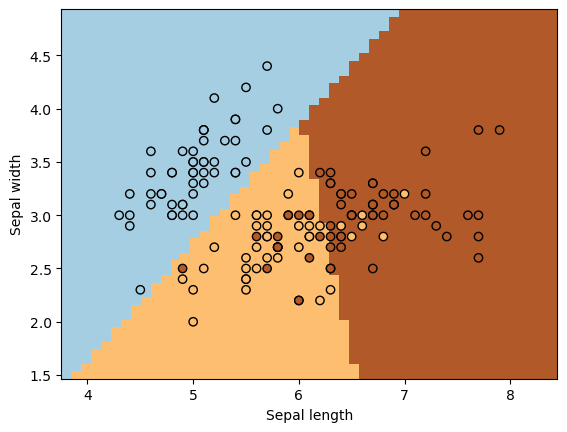

In [ ]:
y_pred = np.reshape(np.argmax(model.predict_probas(grid_dataset), axis=1), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot(plot_method="pcolormesh",
    cmap=plt.cm.Paired,
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width")
display.ax_.scatter(
    X[:, 0], X[:, 1], c=Y, edgecolor="black", 
    cmap=plt.cm.Paired,
)
plt.show()

It sure looks alike !